<a href="https://colab.research.google.com/github/janesh-kiddev/Datasets/blob/main/trvia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [111]:
df = pd.read_csv('/content/car data.xls')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [112]:
df.shape

(301, 9)

In [113]:
print(df.shape[0])
print(df.shape[1])

301
9


In [114]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [115]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [116]:
df.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [117]:
import datetime
date_time = datetime.datetime.now()
df['Age']=date_time.year - df['Year']

<Axes: ylabel='Selling_Price'>

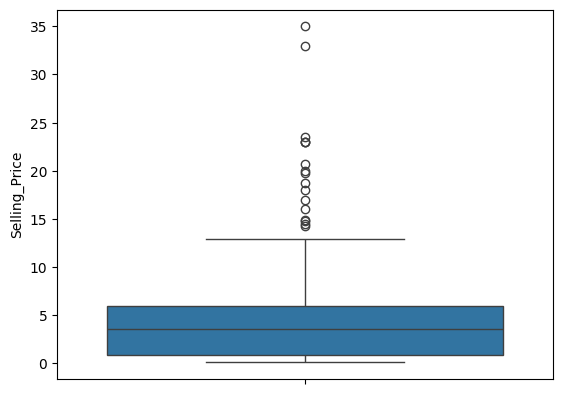

In [118]:
sns.boxplot(df['Selling_Price'])

In [119]:
sorted(df['Selling_Price'],reverse = True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [120]:
df['Selling_Price'].sort_values()

200     0.10
199     0.12
198     0.15
197     0.16
196     0.17
       ...  
82     23.00
93     23.00
63     23.50
64     33.00
86     35.00
Name: Selling_Price, Length: 301, dtype: float64

In [121]:
#df = df.dropna(df.iloc[33:35],axis =1)

In [122]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [123]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [124]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [139]:
X = df.drop(['Car_Name','Selling_Price','Fuel_Type','Seller_Type','Transmission'],axis = 1)
y = df['Selling_Price']

In [140]:
X

,Year,Present_Price,Kms_Driven,Owner,Age
0,2014,5.59,27000,0,10
1,2013,9.54,43000,0,11
2,2017,9.85,6900,0,7
3,2011,4.15,5200,0,13
4,2014,6.87,42450,0,10
...,...,...,...,...,...
296,2016,11.60,33988,0,8
297,2015,5.90,60000,0,9
298,2009,11.00,87934,0,15
299,2017,12.50,9000,0,7


In [127]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = 42)
md = LinearRegression()
md.fit(test_X,test_y)

LinearRegression()

In [142]:
sc1 = md.score(test_X,test_y)*100
sc1

86.01195532413229

In [129]:
rdr = RandomForestRegressor(random_state = 1)
rdr.fit(test_X,test_y)

RandomForestRegressor(random_state=1)

In [143]:
sc2 = rdr.score(test_X,test_y)*100
sc2

96.32116016734913

In [131]:
ft = GradientBoostingRegressor(random_state = 1)
ft.fit(test_X,test_y)

GradientBoostingRegressor(random_state=1)

In [138]:
sc3 = ft.score(test_X,test_y)*100
sc3

99.94799836606087

In [146]:
xg = XGBRegressor(random_state = 1)
xg.fit(test_X,test_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [147]:
sc4 = xg.score(test_X,test_y)*100
sc4

99.99999296879278

model display

In [148]:
p  = pd.DataFrame({'Models':['LinearRegression','RandomForestRegressor',' GradientBoostingRegressor',' XGBRegressor'],'score':[sc1,sc2,sc3,sc4]})
p

,Models,score
0,LinearRegression,86.011955
1,RandomForestRegressor,96.321160
2,GradientBoostingRegressor,99.947998
3,XGBRegressor,99.999993
